# Demo Europeana python library

## Setup

In [1]:
!pip install pyeuropeana

In [2]:
import os
os.environ['EUROPEANA_API_KEY'] = 'api2demo'

In [11]:
import json
from pathlib import Path

import pyeuropeana.apis as apis
import pyeuropeana.utils as utils

save_dir = Path('tmp')

## Search API

In [12]:
search_response =  apis.search(
    query = 'Leiden',
    qf = 'TYPE:IMAGE',
    rows = 250
)

In [13]:
df = utils.resp2df(search_response)

In [14]:
df

,europeana_id,uri,type,image_url,country,description,title,creator,language,rights,provider,dataset_name,concept,concept_lang,description_lang,title_lang
0,/92075/FAC31D5ACA1758404EE710ED210B05BFD6FAFD2C,http://data.europeana.eu/item/92075/FAC31D5ACA...,IMAGE,http://www.theeuropeanlibrary.org/exhibition-t...,Europe,Van Visvliet is a man who remained faithful to...,Contribution by Johannes Le Francq van Berkhey...,Johannes le Francq van Berkhey (1729-1812),mul,http://rightsstatements.org/vocab/InC/1.0/,The European Library,92075_Ag_EU_TEL_a0500_TravelTroughHistory,None,None,{'def': 'Van Visvliet is a man who remained fa...,{'def': 'Contribution by Johannes Le Francq va...
1,/92075/E8A2F1DEE0C33ABE0A40BB8A20267324A46AED9A,http://data.europeana.eu/item/92075/E8A2F1DEE0...,IMAGE,http://www.theeuropeanlibrary.org/exhibition-t...,Europe,Leonardus Hoeufft (1757-1824) obtained his doc...,Contribution by Johan Christian Elin in the Al...,Johan Christiaan Elin (1733-),mul,http://rightsstatements.org/vocab/InC/1.0/,The European Library,92075_Ag_EU_TEL_a0500_TravelTroughHistory,None,None,{'def': 'Leonardus Hoeufft (1757-1824) obtaine...,{'def': 'Contribution by Johan Christian Elin ...
2,/92075/DCF7590949A1A6AC509ACF20C5475D9CF5839ECA,http://data.europeana.eu/item/92075/DCF7590949...,IMAGE,http://www.theeuropeanlibrary.org/exhibition-t...,Europe,The impressive album of Homme van Harinxma is ...,Contribution by Johannes Wilhelmus Velsius in ...,Johannes Wilhelmus Velsius,mul,http://rightsstatements.org/vocab/InC/1.0/,The European Library,92075_Ag_EU_TEL_a0500_TravelTroughHistory,None,None,{'def': 'The impressive album of Homme van Har...,{'def': 'Contribution by Johannes Wilhelmus Ve...
3,/92075/D33AE83582C40E9E615ED4523BED54D4E6832AD8,http://data.europeana.eu/item/92075/D33AE83582...,IMAGE,http://www.theeuropeanlibrary.org/exhibition-t...,Europe,The diplomatist Cornelis de Glarges (1599-1683...,Contribution by David Bailly in the Album amic...,David Bailly (1584-1657),mul,http://rightsstatements.org/vocab/InC/1.0/,The European Library,92075_Ag_EU_TEL_a0500_TravelTroughHistory,None,None,{'def': 'The diplomatist Cornelis de Glarges (...,{'def': 'Contribution by David Bailly in the A...
4,/92075/D169527DB938C212A031B20781A70AF18B41C2F1,http://data.europeana.eu/item/92075/D169527DB9...,IMAGE,http://www.theeuropeanlibrary.org/exhibition-t...,Europe,"The Weimar-born Burchard Grossmann, a steward ...",Contribution by Rembrandt van Rijn in the Albu...,Rembrandt van Rijn (1606-1669),mul,http://rightsstatements.org/vocab/InC/1.0/,The European Library,92075_Ag_EU_TEL_a0500_TravelTroughHistory,None,None,"{'def': 'The Weimar-born Burchard Grossmann, a...",{'def': 'Contribution by Rembrandt van Rijn in...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,/92034/GVNRC_WITS01_PK_F_E216,http://data.europeana.eu/item/92034/GVNRC_WITS...,IMAGE,None,Netherlands,None,Lucie Broedelet zittend met poes,None,nl,http://rightsstatements.org/vocab/InC/1.0/,National Library of the Netherlands - Koninkli...,92034_Ag_EU_TEL,None,None,None,{'def': 'Lucie Broedelet zittend met poes'}
246,/92034/GVNRC_WITS01_PK_F_E215,http://data.europeana.eu/item/92034/GVNRC_WITS...,IMAGE,None,Netherlands,None,"Lucie Broedelet, zonder jas; poes bij deur",None,nl,http://rightsstatements.org/vocab/InC/1.0/,National Library of the Netherlands - Koninkli...,92034_Ag_EU_TEL,None,None,None,"{'def': 'Lucie Broedelet, zonder jas; poes bij..."
247,/92034/GVNRC_WITS01_PK_F_E214,http://data.europeana.eu/item/92034/GVNRC_WITS...,IMAGE,None,Netherlands,None,"Lucie Broedelet, staand met hond",None,nl,http://rightsstatements.org/vocab/InC/1.0/,National Library of the Netherlands - Koninkli...,92034_Ag_EU_TEL,None,None,None,"{'def': 'Lucie Broedelet, staand met hond'}"
248,/92034/GVNRC_WITS01_PK_F_E213,http://data.europeana.eu/item/92034/GVNRC_WITS...,IMAGE,None,Netherlands,None,Dubbelopname Gerlof van Vloten,None,nl,http://rightsstatements.org/vocab/InC/1.0/,National Library of th

In [16]:
# save search response in json
with open(save_dir.joinpath('search_response.json'),'w') as f:
  json.dump(search_response,f)

In [17]:
# save simplified dataframe in csv
df.to_csv(save_dir.joinpath('simplified_search.csv'),index=False)

### Using facets

In [18]:
response = apis.search(
    query = 'PROVIDER:"German Digital Library"',
    profile = 'facets',
    facet = 'DATA_PROVIDER',
    rows = 10
)

facets = response['facets'][0]['fields']
facets

[{'label': 'Deutsche Fotothek', 'count': 1314263},
 {'label': 'Bavarian State Library', 'count': 1241244},
 {'label': 'Deutsches Dokumentationszentrum für Kunstgeschichte - Bildarchiv Foto Marburg',
  'count': 320577},
 {'label': 'German National Library', 'count': 303528},
 {'label': 'Architekturmuseum der Technischen Universität Berlin',
  'count': 146112},
 {'label': 'Ruprecht-Karls-Universität Heidelberg. Universitätsbibliothek',
  'count': 100681},
 {'label': 'Berlin-Brandenburgisches Wirtschaftsarchiv e.V.', 'count': 79175},
 {'label': 'Max-Planck-Institut für Kunstgeschichte. Bibliotheca Hertziana',
  'count': 61643},
 {'label': 'GESIS - Leibniz Institute for the Social Sciences. Library Cologne',
  'count': 54945},
 {'label': 'Architecture Museum at Technical University of Munich',
  'count': 50914},
 {'label': 'Berlin Central and Regional Library', 'count': 39392},
 {'label': 'Photothek des Zentralinstituts für Kunstgeschichte',
  'count': 38240},
 {'label': 'Herzog August Lib

In [19]:
response = apis.search(
    query = 'PROVIDER:"German Digital Library"',
    profile = 'facets',
    facet = 'DATA_PROVIDER',
    rows = 0
)

facets = response['facets'][0]['fields']
facets

[{'label': 'Deutsche Fotothek', 'count': 1314263},
 {'label': 'Bavarian State Library', 'count': 1241244},
 {'label': 'Deutsches Dokumentationszentrum für Kunstgeschichte - Bildarchiv Foto Marburg',
  'count': 320577},
 {'label': 'German National Library', 'count': 303528},
 {'label': 'Architekturmuseum der Technischen Universität Berlin',
  'count': 146112},
 {'label': 'Ruprecht-Karls-Universität Heidelberg. Universitätsbibliothek',
  'count': 100681},
 {'label': 'Berlin-Brandenburgisches Wirtschaftsarchiv e.V.', 'count': 79175},
 {'label': 'Max-Planck-Institut für Kunstgeschichte. Bibliotheca Hertziana',
  'count': 61643},
 {'label': 'GESIS - Leibniz Institute for the Social Sciences. Library Cologne',
  'count': 54945},
 {'label': 'Architecture Museum at Technical University of Munich',
  'count': 50914},
 {'label': 'Berlin Central and Regional Library', 'count': 39392},
 {'label': 'Photothek des Zentralinstituts für Kunstgeschichte',
  'count': 38240},
 {'label': 'Herzog August Lib

In [20]:
# save facets in json
with open(save_dir.joinpath('facets.json'),'w') as f:
  json.dump(facets,f)

## Record API

In [22]:
europeana_id = '/520/providedCHO_4172_HU_MNL_OL_P_240_1__r_7__58_'

In [23]:
uri = utils.europeana_id2uri(europeana_id)
uri

'http://data.europeana.eu/item/520/providedCHO_4172_HU_MNL_OL_P_240_1__r_7__58_'

In [24]:
record_response = apis.record(europeana_id)
record_response

{'apikey': 'api2demo',
 'success': True,
 'statsDuration': 204,
 'requestNumber': 999,
 'object': {'about': '/520/providedCHO_4172_HU_MNL_OL_P_240_1__r_7__58_',
  'aggregations': [{'about': '/aggregation/provider/520/providedCHO_4172_HU_MNL_OL_P_240_1__r_7__58_',
    'edmDataProvider': {'def': ['Magyar Nemzeti Levéltár Országos Levéltára']},
    'edmIsShownBy': 'https://www.eleveltar.hu/kereso-portlet/spring/digitalcontent/getcontent/preservica/989409d1-7145-4280-b024-cb7801d496c0',
    'edmIsShownAt': 'http://www.archivesportaleurope.net/ead-display/-/ead/pl/aicode/HU-28947/type/fa/id/4172/unitid/HU-MNL-OL-P_240-1.-r-7.-58.',
    'edmObject': 'https://www.eleveltar.hu/kereso-portlet/spring/digitalcontent/getcontent/preservica/989409d1-7145-4280-b024-cb7801d496c0',
    'edmProvider': {'def': ['http://data.europeana.eu/organization/1482250000004671077']},
    'edmRights': {'def': ['http://creativecommons.org/licenses/by-nc-sa/4.0/']},
    'edmUgc': 'false',
    'dcRights': {'def': ['CC0

In [25]:
# save record response in json
with open(save_dir.joinpath('record_response.json'),'w') as f:
  json.dump(record_response,f)

In [26]:
image_url = record_response['object']['aggregations'][0]['edmIsShownBy']
image_url

'https://www.eleveltar.hu/kereso-portlet/spring/digitalcontent/getcontent/preservica/989409d1-7145-4280-b024-cb7801d496c0'

In [27]:
img = utils.url2img(image_url)

  Using cached matplotlib-3.5.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
     |████████████████████████████████| 895 kB 7.2 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.3.2-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)


(-0.5, 4464.5, 5443.5, -0.5)

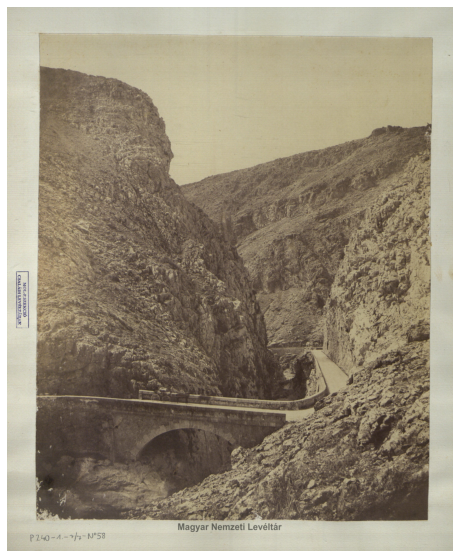

In [30]:
!pip install matplotlib
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
ax.axis('off')

In [31]:
#save image
img.save(save_dir.joinpath('image.jpg'))

## Entity API

In [32]:
suggest_resp = apis.entity.suggest(
    TYPE = 'agent',
    text = 'leonardo'
)
suggest_resp

{'@context': ['https://www.w3.org/ns/ldp.jsonld',
  'http://www.europeana.eu/schemas/context/entity.jsonld'],
 'type': 'ResultPage',
 'total': 10,
 'items': [{'id': 'http://data.europeana.eu/agent/base/146741',
   'type': 'Agent',
   'isShownBy': {'id': 'http://fotothek.slub-dresden.de/fotos/df/hauptkatalog/0108000/df_hauptkatalog_0108756.jpg',
    'type': 'WebResource',
    'source': 'http://data.europeana.eu/item/2048410/item_I5DUPVW2Q5HT2OQFSVXV7VYODA5P32P6',
    'thumbnail': 'https://api.europeana.eu/api/v2/thumbnail-by-url.json?uri=http%3A%2F%2Ffotothek.slub-dresden.de%2Ffotos%2Fdf%2Fhauptkatalog%2F0108000%2Fdf_hauptkatalog_0108756.jpg&type=IMAGE'},
   'prefLabel': {'en': 'Leonardo da Vinci'},
   'altLabel': {'en': ['Leonardo di ser Piero da Vinci',
     'da Vinci, Leonardo']},
   'dateOfBirth': '1452-04-15',
   'dateOfDeath': '1519-05-02'},
  {'id': 'http://data.europeana.eu/agent/base/147897',
   'type': 'Agent',
   'isShownBy': {'id': 'https://gallica.bnf.fr/iiif/ark:/12148/bpt

In [33]:
retrieve_resp = apis.entity.retrieve(
    TYPE = 'agent',
    IDENTIFIER = 25980
)
retrieve_resp

{'@context': 'http://www.europeana.eu/schemas/context/entity.jsonld',
 'id': 'http://data.europeana.eu/agent/base/25980',
 'type': 'Agent',
 'prefLabel': {'en': 'Vittorio Leonardo',
  'fr': 'Vittorio Léonardo',
  'nl': 'Vittorio Leonardo'},
 'altLabel': {'en': ['Leonardo, Vittorio']},
 'dateOfBirth': ['1947'],
 'biographicalInformation': [{'@language': 'en',
   '@value': 'Vittorio Leonardo, born in Italy in 1947, is a colorist of some famous Franco-Belgian comics series. He worked for Spirou magazine and founded the Studio Leonardo, which continued his work.'},
  {'@language': 'fr',
   '@value': "Vittorio Leonardo (né à Naples le 25 novembre 1938) est un coloriste et dessinateur de bande dessinée belge d'origine italienne.Il a commencé sa carrière comme photograveur aux éditions Dupuis.En 1968, il crée le Studio Leonardo, qui réalise la mise en couleurs de différentes séries du journal Spirou, telles que Boule et Bill, Cédric, Les Femmes en blanc, Gaston, Lucky Luke, le Marsupilami, Na

In [34]:
# save responses in json
with open(save_dir.joinpath('suggest_resp.json'),'w') as f:
  json.dump(suggest_resp,f)

with open(save_dir.joinpath('retrieve_resp.json'),'w') as f:
  json.dump(retrieve_resp,f)
